In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Load and preprocess data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [3]:
# For training dataset
train_features = train_data.drop(['Survived', 'Name'], axis=1)
train_features = train_features.replace(to_replace="male", value=1).replace(to_replace="female", value=0)
train_features = train_features.values.T
train_labels = np.zeros(train_data.shape[0],)
train_labels = train_data['Survived'].values.reshape(train_labels.shape[0], 1).T


In [4]:
# For test dataset
test_features = test_data.drop(['Survived', 'Name'], axis=1)
test_features = test_features.replace(to_replace="male", value=1).replace(to_replace="female", value=0)
test_features = test_features.values.T
test_labels = np.zeros(test_data.shape[0],)
test_labels = test_data['Survived'].values.reshape(test_labels.shape[0], 1).T

In [5]:
# Define sigmoid function
def sigmoid_func(z):
    return 1 / (1 + np.exp(-z))

In [6]:
# Define loss function
def compute_loss(y, y_hat, num_samples):
    loss = -(1 / num_samples) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss

In [7]:
# Compute gradients
def compute_gradients(X, y, y_hat, num_samples):
    dw = (1 / num_samples) * np.dot((y_hat - y), X.T)
    db = (1 / num_samples) * np.sum(y_hat - y)
    return dw, db

In [8]:
# Logistic regression model
def logistic_regression_model(X, y, learning_rate, epochs):
    num_samples = X.shape[1]
    loss_values = []
    weights, bias = np.zeros((X.shape[0], 1)), 0

    for i in range(epochs):
        z = np.dot(weights.T, X) + bias
        y_hat = sigmoid_func(z)
        loss = compute_loss(y, y_hat, num_samples)
        dw, db = compute_gradients(X, y, y_hat, num_samples)

        weights = weights - learning_rate * dw.T
        bias = bias - learning_rate * db
        loss_values.append(loss)

        if i % 10000 == 0:
            print(f"Epoch: {i}")
            print(f"Loss: {loss}")

    return weights, bias, loss_values

In [9]:
# Train the model
epochs = 100000
learning_rate = 0.0036
weights, bias, loss_values = logistic_regression_model(train_features, train_labels, learning_rate, epochs)

Epoch: 0
Loss: 0.6931471805599453
Epoch: 10000
Loss: 0.5022857042662064
Epoch: 20000
Loss: 0.4877215500383122
Epoch: 30000
Loss: 0.4799443310761704
Epoch: 40000
Loss: 0.47439764120190375
Epoch: 50000
Loss: 0.4703154374730231
Epoch: 60000
Loss: 0.4672863795801741
Epoch: 70000
Loss: 0.4650242426684055
Epoch: 80000
Loss: 0.46332459319128116
Epoch: 90000
Loss: 0.4620404196427693


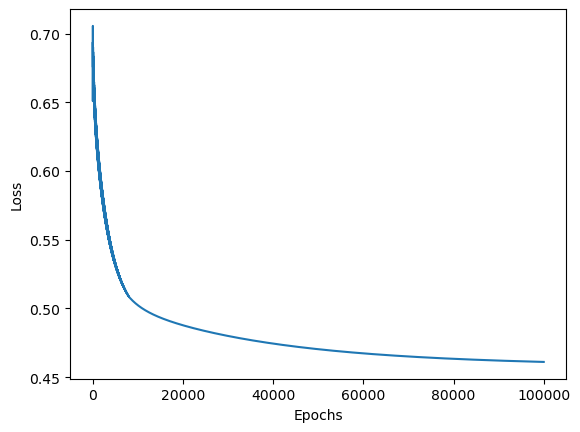

In [10]:
# Plot the loss function
plt.plot(range(epochs),loss_values)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [15]:
# Define accuracy function
def accuracy(X, y, w, b):
    z = np.dot(w.T, X) + b
    y_hat = sigmoid_func(z)
    y_hat = y_hat > 0.5
    y_hat = np.array(z, dtype= "int64")
    accuracy = 100 * (np.sum(np.absolute(y_hat - y)))/y.shape[1]
    print(f"Accuracy of the Model in %age is: {accuracy}")

accuracy(train_features, train_labels, weights, bias)

Accuracy of the Model in %age is: 95.84055459272098
